In [15]:
import cv2
import face_recognition
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot(img, cmap=None):
    plt.axis('off')
    plt.imshow(img, cmap=cmap)
    plt.show()

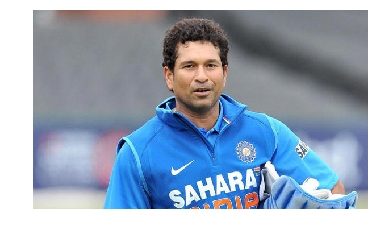

(350, 590, 3)

In [3]:
image = face_recognition.load_image_file("data/image-01.jpeg")
plot(image)
image.shape

### Detect face

In [4]:
face_locations = face_recognition.face_locations(image)
face_locations

[(76, 335, 166, 245)]

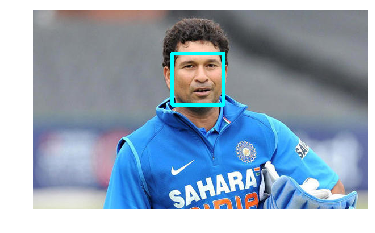

In [5]:
top, right, bottom, left = face_locations[0]
cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 255), 5)
plot(image)

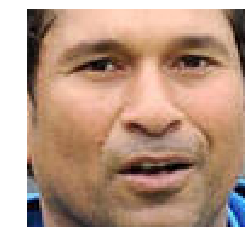

In [6]:
image = face_recognition.load_image_file("data/image-01.jpeg")
plot(image[top: top+bottom-top, left: left+right-left])

## Encode the face

In [7]:
image_encoding = face_recognition.face_encodings(image)[0]
image_encoding, image_encoding.shape

(array([-0.09196313,  0.16604467,  0.05857261, -0.11497161, -0.0918284 ,
        -0.01374003, -0.07519335, -0.03927898,  0.15610115, -0.06870107,
         0.30047789,  0.03242995, -0.26590306, -0.17555395, -0.08992264,
         0.06333034, -0.1498042 , -0.16247301, -0.07210679, -0.01501482,
         0.01218722,  0.00092639,  0.04209897, -0.06442211, -0.06275266,
        -0.42019165, -0.07564657, -0.06223252,  0.07880767, -0.08189019,
         0.02475085,  0.00554363, -0.19799064, -0.08586992, -0.00338384,
         0.06203359,  0.02652208,  0.03425982,  0.18189669,  0.00799836,
        -0.14942271, -0.03022694,  0.04240274,  0.26160854,  0.19224167,
         0.09722058,  0.004862  , -0.0378363 ,  0.03778221, -0.25043839,
         0.16239853,  0.1579237 ,  0.20816085,  0.01480215,  0.16975383,
        -0.13700537,  0.01627998,  0.13716942, -0.21949497,  0.00621206,
         0.03111443,  0.01532113, -0.07089196, -0.05806313,  0.27822316,
         0.12271982, -0.12869433, -0.11712946,  0.1

## Recognize the face

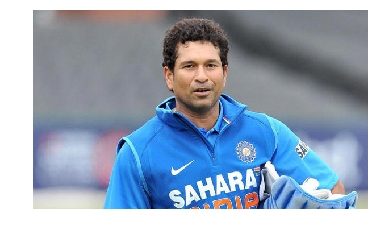

In [8]:
image_01 = face_recognition.load_image_file("data/image-01.jpeg")
plot(image_01)

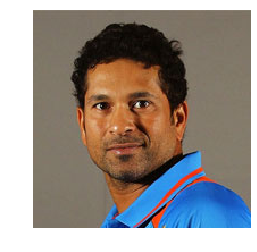

In [9]:
image_02 = face_recognition.load_image_file("data/image-02.jpg")
plot(image_02)

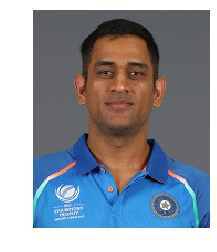

In [10]:
unknow_image = face_recognition.load_image_file("data/unknown.jpg")
plot(unknow_image)

compute encoding vector for all the images

In [11]:
image_01_encoding = face_recognition.face_encodings(image_01)[0]
image_02_encoding = face_recognition.face_encodings(image_02)[0]
unknown_encoding = face_recognition.face_encodings(unknow_image)[0]

Compare the images

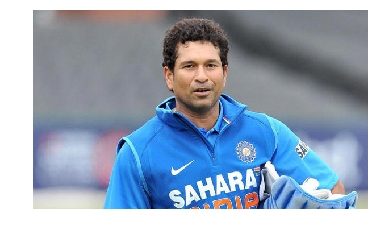

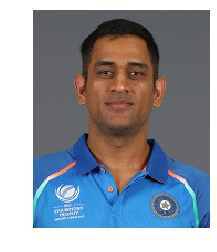

Same person: [False]


In [12]:
result = face_recognition.compare_faces([image_01_encoding], unknown_encoding)
plot(image_01); plot(unknow_image)
print('Same person:', result)

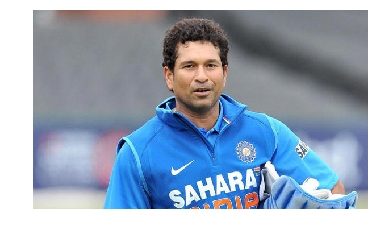

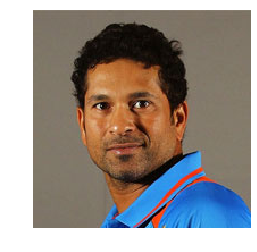

Same person: True


In [31]:
result = face_recognition.compare_faces([image_01_encoding], image_02_encoding)
plot(image_01); plot(image_02)
print('Same person:', result[0] == True)

Calculate the distance of those embeddings

In [16]:
sim_dist = np.linalg.norm(image_01_encoding - image_02_encoding)
sim_dist

0.3527275933204973

In [18]:
diff_dist = np.linalg.norm(image_01_encoding - unknown_encoding)
diff_dist

0.6357396570353534

## Liveness Detection